In [1]:
import os
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import cv2

In [2]:
data_dir = '../data'
headgear_dir = os.path.join(data_dir, 'headgear')
headgear_csv = os.path.join(headgear_dir, 'headgear.csv')

print(headgear_csv)

../data/headgear/headgear.csv


In [3]:
headgear_df = pd.read_csv(headgear_csv)

In [4]:
print(headgear_df)

      class id                filepaths     labels data set
0            0  train/ASCOT CAP/001.jpg  ASCOT CAP    train
1            0  train/ASCOT CAP/002.jpg  ASCOT CAP    train
2            0  train/ASCOT CAP/003.jpg  ASCOT CAP    train
3            0  train/ASCOT CAP/004.jpg  ASCOT CAP    train
4            0  train/ASCOT CAP/005.jpg  ASCOT CAP    train
...        ...                      ...        ...      ...
3815        19    valid/ZUCCHETTO/1.jpg  ZUCCHETTO    valid
3816        19    valid/ZUCCHETTO/2.jpg  ZUCCHETTO    valid
3817        19    valid/ZUCCHETTO/3.jpg  ZUCCHETTO    valid
3818        19    valid/ZUCCHETTO/4.jpg  ZUCCHETTO    valid
3819        19    valid/ZUCCHETTO/5.jpg  ZUCCHETTO    valid

[3820 rows x 4 columns]


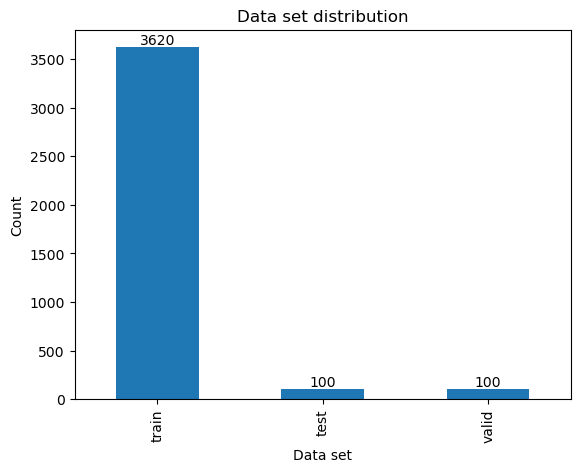

In [5]:
headgear_df['data set'].value_counts().plot(kind='bar')

plt.title('Data set distribution')
plt.xlabel('Data set')
plt.ylabel('Count')

for i in range(len(headgear_df['data set'].value_counts())):
    plt.text(i, headgear_df['data set'].value_counts()[i], headgear_df['data set'].value_counts()[i], ha='center', va='bottom')
    
plt.show()

In [6]:
headgear_df['data set'].value_counts()

train    3620
test      100
valid     100
Name: data set, dtype: int64

In [7]:
train_data_df = headgear_df[headgear_df['data set'] == 'train']
valid_data_df = headgear_df[headgear_df['data set'] == 'valid']
test_data_df = headgear_df[headgear_df['data set'] == 'test']

In [8]:
train_data_df.head()

,class id,filepaths,labels,data set
0,0,train/ASCOT CAP/001.jpg,ASCOT CAP,train
1,0,train/ASCOT CAP/002.jpg,ASCOT CAP,train
2,0,train/ASCOT CAP/003.jpg,ASCOT CAP,train
3,0,train/ASCOT CAP/004.jpg,ASCOT CAP,train
4,0,train/ASCOT CAP/005.jpg,ASCOT CAP,train


In [9]:
headgear_dir

'../data/headgear'

In [10]:
image_path = os.path.join(headgear_dir, train_data_df['filepaths'][0])
print(image_path)

../data/headgear/train/ASCOT CAP/001.jpg


In [12]:
image = cv2.imread(image_path)
print('Image Size: ', image.shape)
# print(cv2.getBuildInformation())
cv2.imshow('image', image)

Image Size:  (224, 224, 3)


error: OpenCV(3.4.2) /tmp/build/80754af9/opencv-suite_1535558553474/work/modules/highgui/src/window.cpp:632: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Carbon support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'
